### Librerie

In [20]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from scipy import stats
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Preparazione dei dati

In [21]:
accuracy_ab = 0.8098
precision_ab = 0.8557
recall_ab = 0.83
f1_score_ab = 0.8426
roc_auc_ab = 0.8039

"""
accuracy_gnb = 0.7669
precision_gnb = 0.9429
recall_gnb = 0.6600
f1_score_gnb = 0.7765
roc_auc_gnb = 0.7983
"""

accuracy_gb = 0.8344
precision_gb = 0.8476
recall_gb = 0.89
f1_score_gb = 0.8683
roc_auc_gb = 0.818

accuracy_mnb = 0.6994
precision_mnb = 0.84
recall_mnb = 0.63
f1_score_mnb = 0.72
roc_auc_mnb = 0.7198

accuracy_pls = 0.816
precision_pls = 0.8723
recall_pls = 0.82
f1_score_pls = 0.8454
roc_auc_pls = 0.8148

accuracy_rf = 0.7514
precision_rf = 0.7434
recall_rf = 0.84
f1_score_rf = 0.7887
roc_auc_rf = 0.7410

accuracy_svm = 0.8037
precision_svm = 0.8269
recall_svm = 0.86
f1_score_svm = 0.8431
roc_auc_svm = 0.7871

accuracy_xgb = 0.8344
precision_xgb = 0.8411
recall_xgb = 0.9
f1_score_xgb = 0.8696
roc_auc_xgb = 0.8151

data = {
    'AdaBoost': [accuracy_ab, precision_ab, recall_ab, f1_score_ab, roc_auc_ab],
    'Gradient Boosting': [accuracy_gb, precision_gb, recall_gb, f1_score_gb, roc_auc_gb],
    'Multinomial NB': [accuracy_mnb, precision_mnb, recall_mnb, f1_score_mnb, roc_auc_mnb],
    'Partial Least Squares': [accuracy_pls, precision_pls, recall_pls, f1_score_pls, roc_auc_pls],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_score_rf, roc_auc_rf],
    'Support Vector Machine': [accuracy_svm, precision_svm, recall_svm, f1_score_svm, roc_auc_svm],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb, roc_auc_xgb],
}

df = pd.DataFrame(data, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'])

In [22]:
print(df)

           AdaBoost  Gradient Boosting  Multinomial NB  Partial Least Squares  \
Accuracy     0.8098             0.8344          0.6994                 0.8160   
Precision    0.8557             0.8476          0.8400                 0.8723   
Recall       0.8300             0.8900          0.6300                 0.8200   
F1-score     0.8426             0.8683          0.7200                 0.8454   
ROC AUC      0.8039             0.8180          0.7198                 0.8148   

           Random Forest  Support Vector Machine  XGBoost  
Accuracy          0.7514                  0.8037   0.8344  
Precision         0.7434                  0.8269   0.8411  
Recall            0.8400                  0.8600   0.9000  
F1-score          0.7887                  0.8431   0.8696  
ROC AUC           0.7410                  0.7871   0.8151  


### Performance dei modelli sul dataset ST000369

Per ciascuna metrica illustriamo i modelli di apprendimento automatico con la metrica migliore.

In [23]:
best_algorithms = df.idxmax(axis=1)

# Stampa i risultati
print("Algoritmo migliore per ciascuna metrica:")
for metric, algorithm in best_algorithms.items():
    print(f"{metric}: {algorithm}")

Algoritmo migliore per ciascuna metrica:
Accuracy: Gradient Boosting
Precision: Partial Least Squares
Recall: XGBoost
F1-score: XGBoost
ROC AUC: Gradient Boosting


Adesso visualizziamo le performance dei vari modelli.

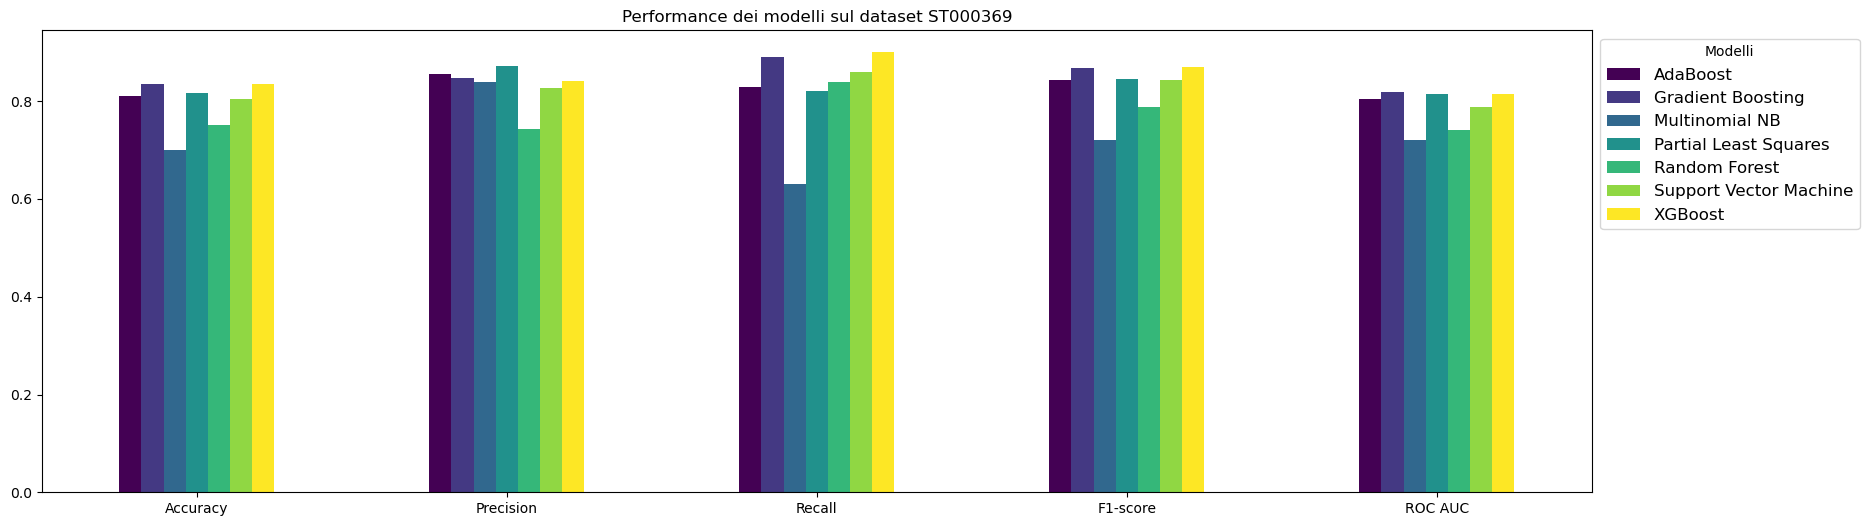

In [24]:
df.plot(kind='bar', rot=0, figsize=(20, 6), colormap='viridis')
plt.title('Performance dei modelli sul dataset ST000369')
plt.legend(title='Modelli', bbox_to_anchor=(1, 1), loc='upper left', fontsize='large')

plt.show()

In [25]:
fig = px.bar(df.T, barmode='group', title='Confronto delle performance dei modelli sul dataset ST000369',
             labels={'value': 'Valore', 'variable': 'Metrica', 'index': 'Modello',},
             width=800, height=500)

fig.update_layout(showlegend=True, legend_title='Metriche', legend=dict(x=1, y=1, traceorder='normal'))

fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='')

### Curve ROC per ciascun modello

### Boxplot delle metriche ottenute

Il boxplot ci da un'idea della variabilità delle performance di ciascun modello sulle diverse metriche.

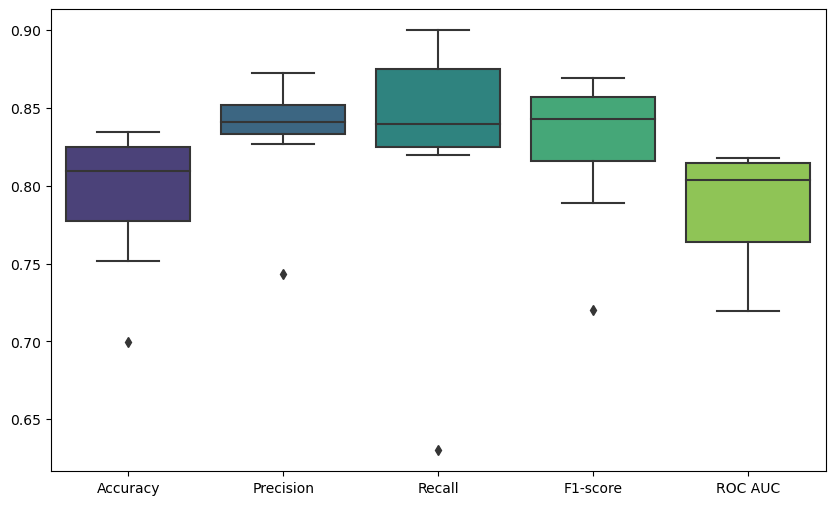

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.T, palette='viridis')
plt.show()

### Heatmap

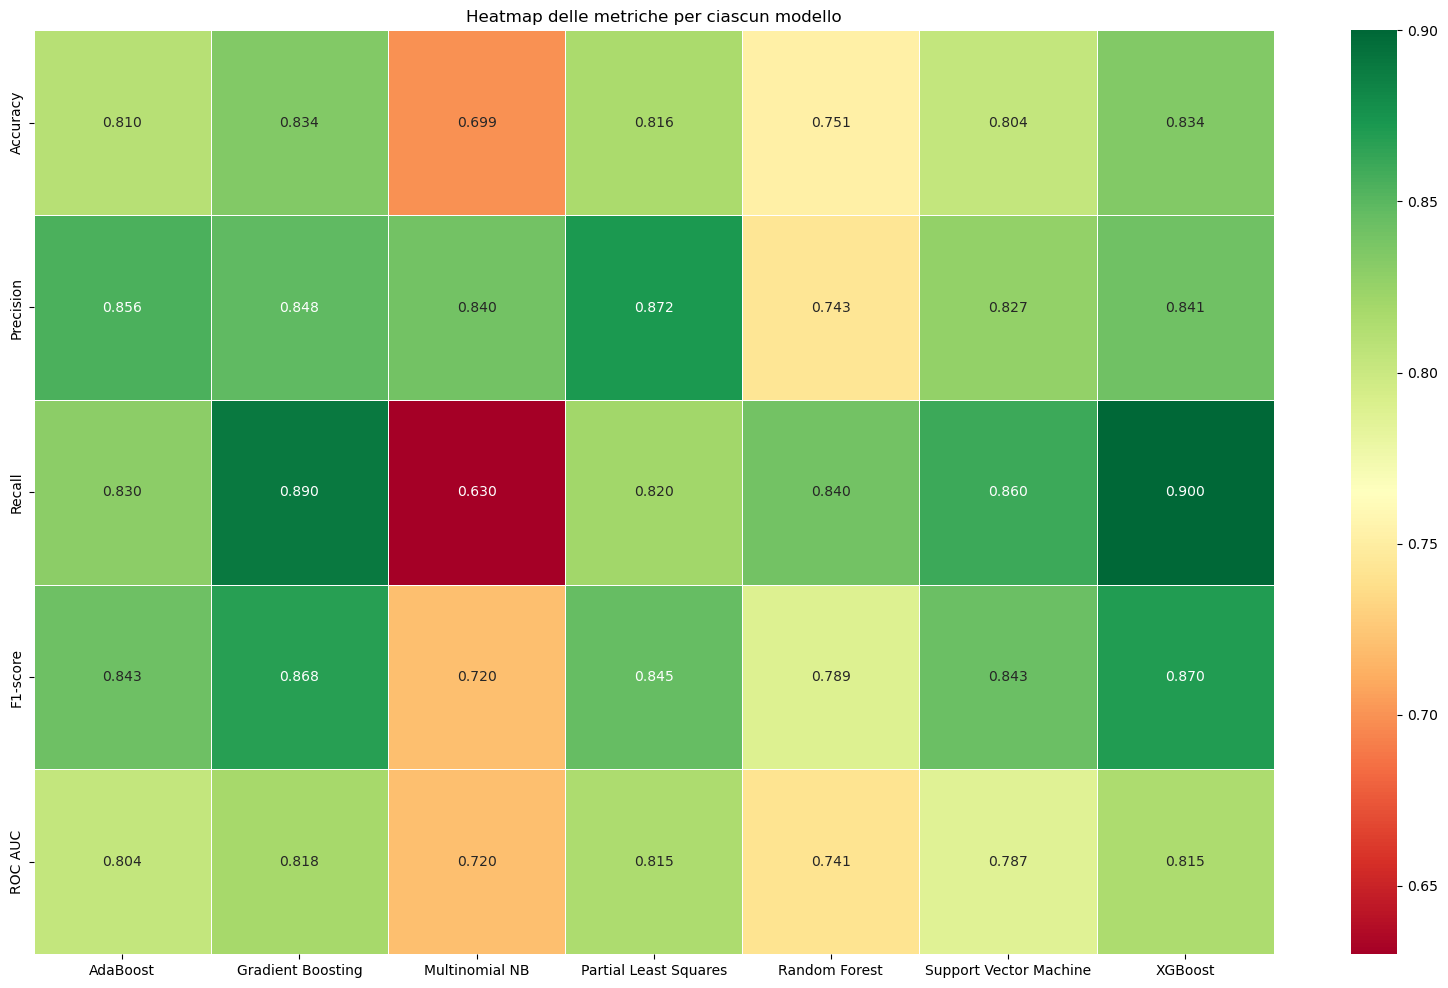

In [ ]:
plt.figure(figsize=(20, 12))

sns.heatmap(df, annot=True, cmap='RdYlGn', fmt=".3f", linewidths=.5)
plt.title('Heatmap delle metriche per ciascun modello')
plt.show()